In [1]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [2]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    # print(data)
    return data[:,:2], data[:,-1]


In [3]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [4]:
class LogisticReressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def data_matrix(self, X):
        data_mat = []
        for d in X:
            # 取出X中的每一行，然后把这一行全部加进去。*d代表完整的一行
            data_mat.append([1.0, *d])
        return data_mat

    def fit(self, X, y):
        # label = np.mat(y)
        data_mat = self.data_matrix(X)  # m*n
        # 3*1的0向量，为w
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)

        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights) #矢量的内积
                                      )
                error = y[i] - result
                self.weights += self.learning_rate * error * np.transpose(
                    [data_mat[i]])
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter))

    # def f(self, x):
    #     return -(self.weights[0] + self.weights[1] * x) / self.weights[2]

    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

In [11]:
data_mat = []
for d in X:
    # 取出X中的每一行，然后把这一行全部加进去。*d代表完整的一行
    data_mat.append([1.0, *d])
weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)
print(data_mat, weights)
weights

[[1.0, 5.1, 3.5], [1.0, 4.9, 3.0], [1.0, 4.7, 3.2], [1.0, 4.6, 3.1], [1.0, 5.0, 3.6], [1.0, 5.4, 3.9], [1.0, 4.6, 3.4], [1.0, 5.0, 3.4], [1.0, 4.4, 2.9], [1.0, 4.9, 3.1], [1.0, 5.4, 3.7], [1.0, 4.8, 3.4], [1.0, 4.8, 3.0], [1.0, 4.3, 3.0], [1.0, 5.8, 4.0], [1.0, 5.7, 4.4], [1.0, 5.4, 3.9], [1.0, 5.1, 3.5], [1.0, 5.7, 3.8], [1.0, 5.1, 3.8], [1.0, 5.4, 3.4], [1.0, 5.1, 3.7], [1.0, 4.6, 3.6], [1.0, 5.1, 3.3], [1.0, 4.8, 3.4], [1.0, 5.0, 3.0], [1.0, 5.0, 3.4], [1.0, 5.2, 3.5], [1.0, 5.2, 3.4], [1.0, 4.7, 3.2], [1.0, 4.8, 3.1], [1.0, 5.4, 3.4], [1.0, 5.2, 4.1], [1.0, 5.5, 4.2], [1.0, 4.9, 3.1], [1.0, 5.0, 3.2], [1.0, 5.5, 3.5], [1.0, 4.9, 3.6], [1.0, 4.4, 3.0], [1.0, 5.1, 3.4], [1.0, 5.0, 3.5], [1.0, 4.5, 2.3], [1.0, 4.4, 3.2], [1.0, 5.0, 3.5], [1.0, 5.1, 3.8], [1.0, 4.8, 3.0], [1.0, 5.1, 3.8], [1.0, 4.6, 3.2], [1.0, 5.3, 3.7], [1.0, 5.0, 3.3], [1.0, 7.0, 3.2], [1.0, 6.4, 3.2], [1.0, 6.9, 3.1], [1.0, 5.5, 2.3], [1.0, 6.5, 2.8], [1.0, 5.7, 2.8], [1.0, 6.3, 3.3], [1.0, 4.9, 2.4], [1.0, 6.6, 2.

array([[0.],
       [0.],
       [0.]], dtype=float32)

In [12]:
lr_clf = LogisticReressionClassifier()
lr_clf.fit(X_train, y_train)


LogisticRegression Model(learning_rate=0.01,max_iter=200)


In [13]:
lr_clf.score(X_test, y_test)


1.0

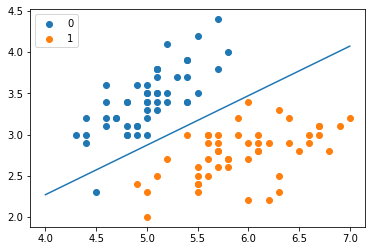

In [14]:
x_ponits = np.arange(4, 8)
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2]
plt.plot(x_ponits, y_)

#lr_clf.show_graph()
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()


scikit-learn实例

sklearn.linear_model.LogisticRegression

solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：
a) liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
b) lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
c) newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
d) sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression(max_iter=200)


In [17]:
clf.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
clf.score(X_test, y_test)


1.0

In [19]:
print(clf.coef_, clf.intercept_)


[[ 2.59228754 -2.78000087]] [-5.38795557]


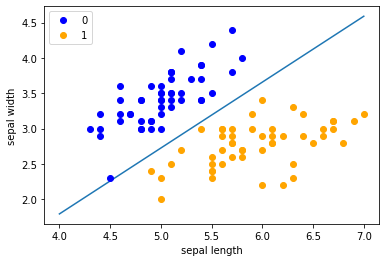

In [20]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()


  写出Logistic回归模型学习的梯度下降算法。
解答：

对于Logistic模型：$$P(Y=1 | x)=\frac{\exp (w \cdot x+b)}{1+\exp (w \cdot x+b)} \\ P(Y=0 | x)=\frac{1}{1+\exp (w \cdot x+b)}

$$对数似然函数为：$\displaystyle L(w)=\sum_{i=1}^N \left[y_i (w \cdot x_i)-\log \left(1+\exp (w \cdot x_i)\right)\right]$

似然函数求偏导，可得$\displaystyle \frac{\partial L(w)}{\partial w^{(j)}}=\sum_{i=1}^N\left[x_i^{(j)} \cdot y_i-\frac{\exp (w \cdot x_i) \cdot x_i^{(j)}}{1+\exp (w \cdot x_i)}\right]$

梯度函数为：$\displaystyle \nabla L(w)=\left[\frac{\partial L(w)}{\partial w^{(0)}}, \cdots, \frac{\partial L(w)}{\partial w^{(m)}}\right]$

Logistic回归模型学习的梯度下降算法：

(1) 取初始值$x^{(0)} \in R$，置$k=0$

(2) 计算$f(x^{(k)})$

(3) 计算梯度$g_k=g(x^{(k)})$，当$\|g_k\| &lt; \varepsilon$时，停止迭代，令$x^* = x^{(k)}$；否则，求$\lambda_k$，使得$\displaystyle f(x^{(k)}+\lambda_k g_k) = \max_{\lambda \geqslant 0}f(x^{(k)}+\lambda g_k)$

(4) 置$x^{(k+1)}=x^{(k)}+\lambda_k g_k$，计算$f(x^{(k+1)})$，当$\|f(x^{(k+1)}) - f(x^{(k)})\| &lt; \varepsilon$或 $\|x^{(k+1)} - x^{(k)}\| &lt; \varepsilon$时，停止迭代，令$x^* = x^{(k+1)}$

(5) 否则，置$k=k+1$，转(3)

In [ ]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import mpl

# 图像显示中文
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']


class LogisticRegression:
    def __init__(self, learn_rate=0.1, max_iter=10000, tol=1e-2):
        self.learn_rate = learn_rate  # 学习率
        self.max_iter = max_iter  # 迭代次数
        self.tol = tol  # 迭代停止阈值
        self.w = None  # 权重

    def preprocessing(self, X):
        """将原始X末尾加上一列，该列数值全部为1"""
        row = X.shape[0]
        y = np.ones(row).reshape(row, 1)
        X_prepro = np.hstack((X, y))
        return X_prepro

    def sigmod(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X_train, y_train):
        X = self.preprocessing(X_train)
        y = y_train.T
        # 初始化权重w
        self.w = np.array([[0] * X.shape[1]], dtype=np.float)
        k = 0
        for loop in range(self.max_iter):
            # 计算梯度
            z = np.dot(X, self.w.T)
            grad = X * (y - self.sigmod(z))
            grad = grad.sum(axis=0)
            # 利用梯度的绝对值作为迭代中止的条件
            if (np.abs(grad) <= self.tol).all():
                break
            else:
                # 更新权重w 梯度上升——求极大值
                self.w += self.learn_rate * grad
                k += 1
        print("迭代次数：{}次".format(k))
        print("最终梯度：{}".format(grad))
        print("最终权重：{}".format(self.w[0]))

    def predict(self, x):
        p = self.sigmod(np.dot(self.preprocessing(x), self.w.T))
        print("Y=1的概率被估计为：{:.2%}".format(p[0][0]))  # 调用score时，注释掉
        p[np.where(p > 0.5)] = 1
        p[np.where(p < 0.5)] = 0
        return p

    def score(self, X, y):
        y_c = self.predict(X)
        error_rate = np.sum(np.abs(y_c - y.T)) / y_c.shape[0]
        return 1 - error_rate

    def draw(self, X, y):
        # 分离正负实例点
        y = y[0]
        X_po = X[np.where(y == 1)]
        X_ne = X[np.where(y == 0)]
        # 绘制数据集散点图
        ax = plt.axes(projection='3d')
        x_1 = X_po[0, :]
        y_1 = X_po[1, :]
        z_1 = X_po[2, :]
        x_2 = X_ne[0, :]
        y_2 = X_ne[1, :]
        z_2 = X_ne[2, :]
        ax.scatter(x_1, y_1, z_1, c="r", label="正实例")
        ax.scatter(x_2, y_2, z_2, c="b", label="负实例")
        ax.legend(loc='best')
        # 绘制p=0.5的区分平面
        x = np.linspace(-3, 3, 3)
        y = np.linspace(-3, 3, 3)
        x_3, y_3 = np.meshgrid(x, y)
        a, b, c, d = self.w[0]
        z_3 = -(a * x_3 + b * y_3 + d) / c
        ax.plot_surface(x_3, y_3, z_3, alpha=0.5)  # 调节透明度
        plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/shenheng/anaconda3/envs/Py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shenheng/anaconda3/envs/Py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shenheng/anaconda3/envs/Py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20363 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shenheng/anaconda3/envs/Py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 36127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shenheng/anaconda3/envs/Py/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27491 missing from curr

迭代次数：3232次
最终梯度：[ 0.00144779  0.00046133  0.00490279 -0.00999848]
最终权重：[  2.96908597   1.60115396   5.04477438 -13.43744079]


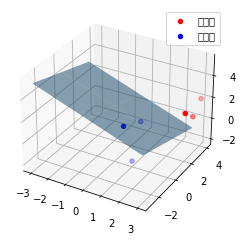

In [22]:
# 训练数据集
X_train = np.array([[3, 3, 3], [4, 3, 2], [2, 1, 2], [1, 1, 1], [-1, 0, 1],
                    [2, -2, 1]])
y_train = np.array([[1, 1, 1, 0, 0, 0]])
# 构建实例，进行训练
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.draw(X_train, y_train)
